# ALS Grid Search Visualization

This notebook loads the latest `als_grid_*.json` from `artifacts/metrics/` and visualizes RMSE and Precision@10 across the grid.



In [1]:
from pathlib import Path
import json
import re

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

metrics_dir = Path("../artifacts/metrics")

# Find latest grid json
candidates = sorted(metrics_dir.glob("als_grid_*.json"))
if not candidates:
    raise FileNotFoundError("No als_grid_*.json found in ../artifacts/metrics. Run train_als first.")

latest = candidates[-1]
with open(latest) as f:
    grid = json.load(f)

grid_results = grid["grid_results"]
rows = []
for entry in grid_results:
    params = entry["params"]
    mets = entry["metrics"]
    rows.append({
        "rank": params.get("rank"),
        "regParam": params.get("regParam"),
        "rmse": mets.get("rmse"),
        "precision_at_10": mets.get("precision@k"),
        "ndcg_at_10": mets.get("ndcg@k"),
    })

df = pd.DataFrame(rows)
print(f"Loaded {len(df)} candidates from {latest.name}")
df


Loaded 6 candidates from als_grid_20251021T212920Z.json


,rank,regParam,rmse,precision_at_10,ndcg_at_10
0,32,0.02,2.072006,0.797784,0.856169
1,32,0.05,1.538615,0.797897,0.859348
2,32,0.10,1.346179,0.797990,0.862528
3,32,0.20,1.274171,0.798036,0.864356
4,32,0.40,1.245851,0.798071,0.865960
5,32,0.80,1.366408,0.798079,0.866212


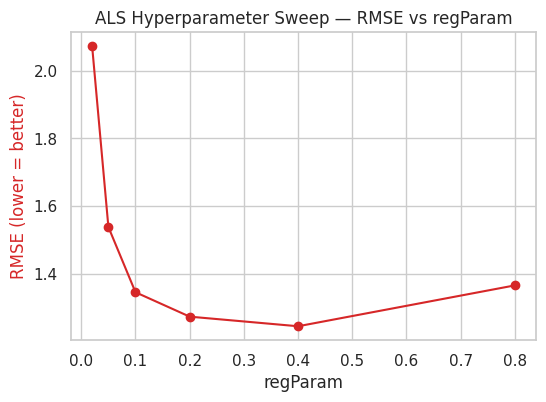

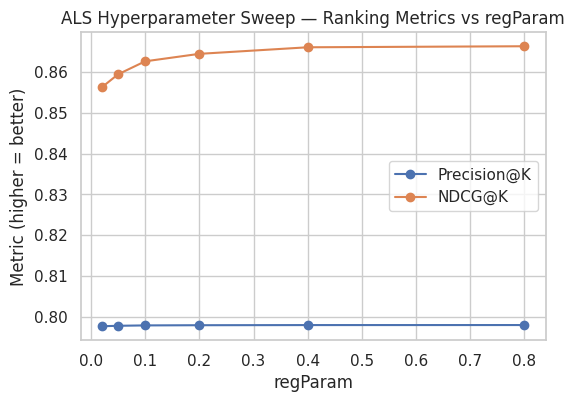

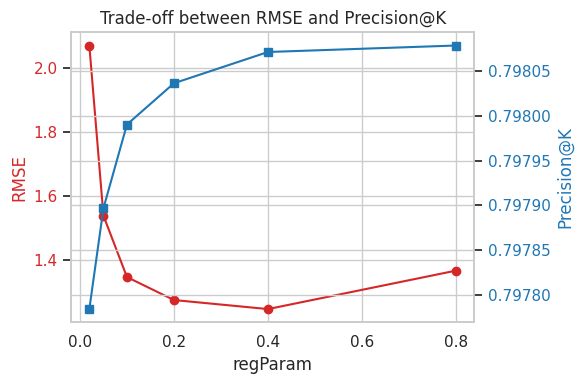

In [7]:
# --- Plot RMSE vs regParam ---
plt.figure(figsize=(6,4))
plt.plot(df["regParam"], df["rmse"], marker="o", color="tab:red")
plt.xlabel("regParam")
plt.ylabel("RMSE (lower = better)", color="tab:red")
plt.title("ALS Hyperparameter Sweep — RMSE vs regParam")
plt.grid(True)
plt.show()

# --- Plot ranking metrics vs regParam ---
plt.figure(figsize=(6,4))
plt.plot(df["regParam"], df["precision_at_10"], marker="o", label="Precision@K")
plt.plot(df["regParam"], df["ndcg_at_10"], marker="o", label="NDCG@K")
plt.xlabel("regParam")
plt.ylabel("Metric (higher = better)")
plt.title("ALS Hyperparameter Sweep — Ranking Metrics vs regParam")
plt.legend()
plt.grid(True)
plt.show()

# --- Optional: dual-axis view (RMSE + Precision@K) ---
fig, ax1 = plt.subplots(figsize=(6,4))
color = "tab:red"
ax1.set_xlabel("regParam")
ax1.set_ylabel("RMSE", color=color)
ax1.plot(df["regParam"], df["rmse"], marker="o", color=color)
ax1.tick_params(axis="y", labelcolor=color)

ax2 = ax1.twinx()  # secondary axis
color = "tab:blue"
ax2.set_ylabel("Precision@K", color=color)
ax2.plot(df["regParam"], df["precision_at_10"], marker="s", color=color)
ax2.tick_params(axis="y", labelcolor=color)

plt.title("Trade-off between RMSE and Precision@K")
fig.tight_layout()
plt.show()
